In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json  ~/.kaggle

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
 !kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:10<00:00, 146MB/s]
100% 1.06G/1.06G [00:11<00:00, 104MB/s]


In [8]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('./content')
zip_ref.close()

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

import matplotlib.pyplot as plt


In [45]:
#generators: divides the into small patches instead of working on the  whole data at a time.

In [46]:
import cv2

In [47]:
img=cv2.imread('/content/content/train/cats/cat.0.jpg')

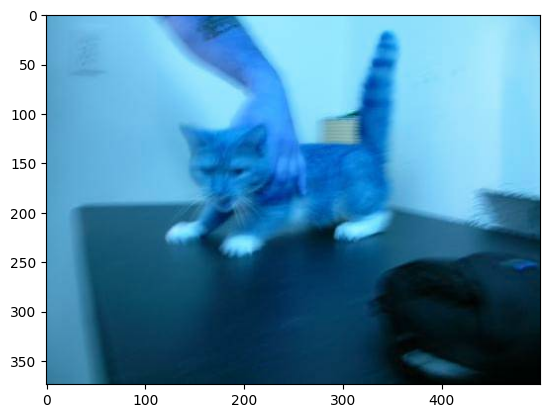

In [48]:
plt.imshow(img)

In [49]:
train_data=tf.keras.utils.image_dataset_from_directory(
    directory= '/content/content/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 20000 files belonging to 2 classes.


In [50]:
test_data=tf.keras.utils.image_dataset_from_directory(
    directory= '/content/content/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5000 files belonging to 2 classes.


In [51]:
#normalising the data

In [52]:
def process(image,label):
  image=tf.cast(image/255, tf.float32)
  return image,label

train_data=train_data.map(process)
test_data=test_data.map(process)

In [53]:
# create cnn model

In [54]:

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                      

In [55]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
history=model.fit(train_data,epochs=200,validation_data=test_data)

625/625 [==============================] - 67s 101ms/step - loss: 1.9076 - accuracy: 0.6061 - val_loss: 0.6291 - val_accuracy: 0.6406


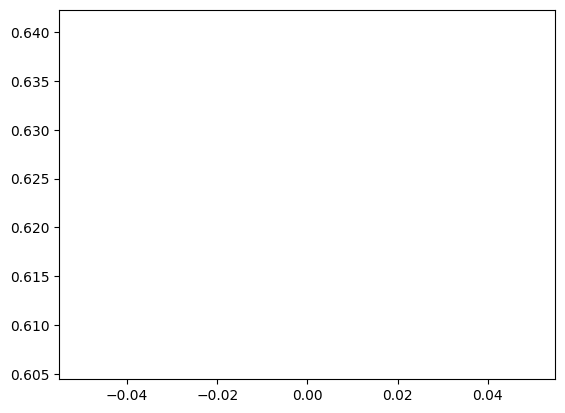

In [57]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.show()

In [58]:
img=cv2.imread('/content/content/test/cats/cat.10000.jpg')
print(img.shape)

(359, 431, 3)


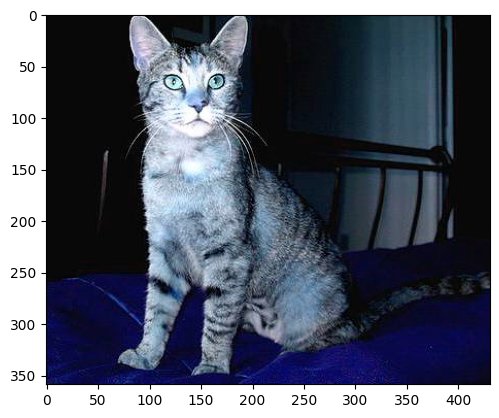

In [59]:
plt.imshow(img)

In [60]:
test_img=cv2.resize(img,(256,256))

[[[ 8  8  8]
  [ 8  8  8]
  [ 8  8  8]
  ...
  [ 8  8  8]
  [ 8  8  8]
  [ 8  8  8]]

 [[ 8  8  8]
  [ 8  8  8]
  [ 8  8  8]
  ...
  [ 8  8  8]
  [ 8  8  8]
  [ 8  8  8]]

 [[ 8  8  8]
  [ 8  8  8]
  [ 8  8  8]
  ...
  [ 8  8  8]
  [ 8  8  8]
  [ 8  8  8]]

 ...

 [[19 26 92]
  [27 29 94]
  [24 21 87]
  ...
  [ 9  9 23]
  [ 9  7 26]
  [ 9  7 27]]

 [[ 7 17 80]
  [19 22 85]
  [23 21 84]
  ...
  [ 8  9 20]
  [ 8  8 22]
  [ 8  7 24]]

 [[20 32 94]
  [31 36 97]
  [24 21 83]
  ...
  [ 7 10 16]
  [ 7  9 18]
  [ 7  7 19]]]


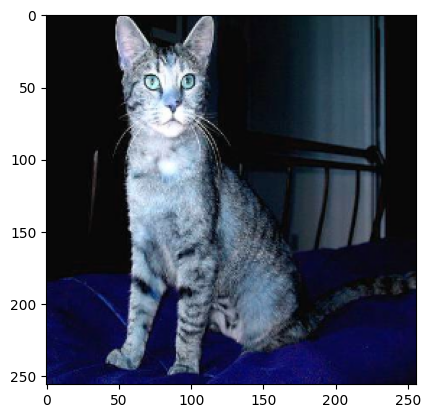

In [61]:
plt.imshow(test_img)
print(test_img)

In [62]:
print(test_img.shape)
test_img=test_img.reshape((1,256,256,3))  # model accepts the sequence of the images

(256, 256, 3)


In [63]:

model.predict(test_img)

1/1 [==============================] - 0s 108ms/step


array([[1.]], dtype=float32)

In [64]:
test_img

array([[[[ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8],
         ...,
         [ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8]],

        [[ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8],
         ...,
         [ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8]],

        [[ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8],
         ...,
         [ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8]],

        ...,

        [[19, 26, 92],
         [27, 29, 94],
         [24, 21, 87],
         ...,
         [ 9,  9, 23],
         [ 9,  7, 26],
         [ 9,  7, 27]],

        [[ 7, 17, 80],
         [19, 22, 85],
         [23, 21, 84],
         ...,
         [ 8,  9, 20],
         [ 8,  8, 22],
         [ 8,  7, 24]],

        [[20, 32, 94],
         [31, 36, 97],
         [24, 21, 83],
         ...,
         [ 7, 10, 16],
         [ 7,  9, 18],
         [ 7,  7, 19]]]], dtype=uint8)